In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from prettytable import PrettyTable

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant,OLS

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
cycledf = pd.read_csv('train.csv', parse_dates=True, index_col=0)
cycledf.shape

(10886, 11)

# Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [3]:
cycledf.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2011-01-01 00:00:00        81        0.0       3          13     16  
2011-01-01 01:00:00        80        0.0       8          32     40  
2011-01-01 02:00:00        80        0.0       5          27     32  
2011-01-01 03:00:00        75        0.0       3          10     13  
2011-01-01 04:00:00        75        0.0       0           1      1

In [4]:
cycledf.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
cycledf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [6]:
cycledf["year"] = cycledf.index.year
cycledf["month"] = cycledf.index.month
cycledf["day of week"] = cycledf.index.dayofweek
cycledf["hour"] = cycledf.index.hour

In [7]:
cycledf.head(5)

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  year  \
datetime                                                                    
2011-01-01 00:00:00        81        0.0       3          13     16  2011   
2011-01-01 01:00:00        80        0.0       8          32     40  2011   
2011-01-01 02:00:00        80        0.0       5          27     32  2011   
2011-01-01 03:00:00        75        0.0       3          10     13  2011   
2011-01-01 04:00:00        75        0.0       0           1      1  2011   

                     month  day of week  hour  
datetime                                       
2011-01-01 00:00:00      1            5     0  
2011-01-01 01:00:00      1            5     1  
2011-01-01 02:00:00      1            5     2  
2011-01-01 03:00:00      1            5     3  
2011-01-01 04:00:00      1            5     4

day of week - Monday=0 and Sunday=6

# EDA

<AxesSubplot:>

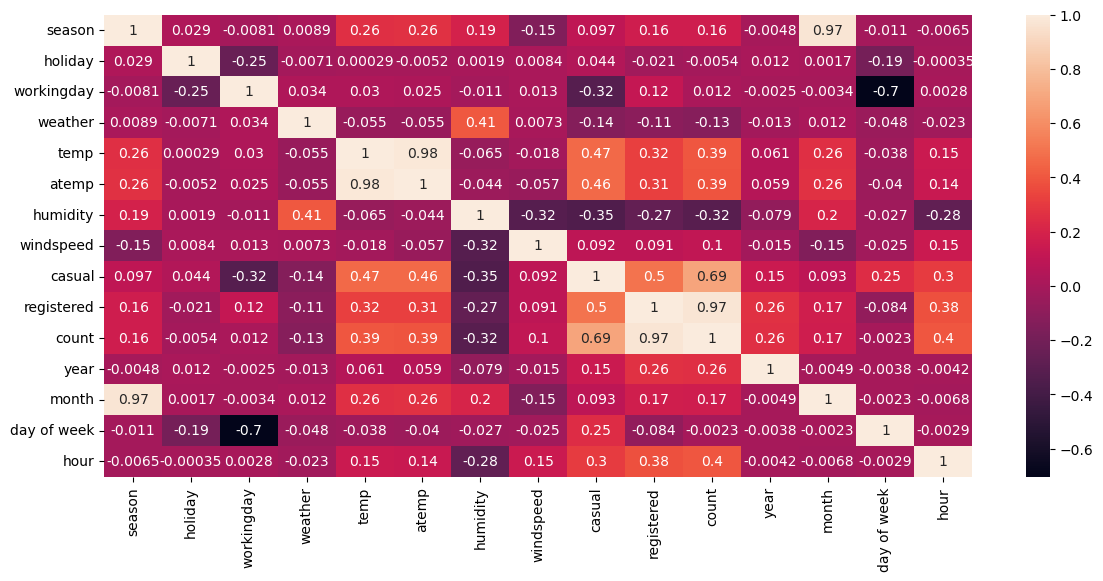

In [8]:
# Finding Correlation
plt.figure(figsize=(14,6))
sns.heatmap(cycledf.corr(),annot=True)

<AxesSubplot:xlabel='hour', ylabel='count'>

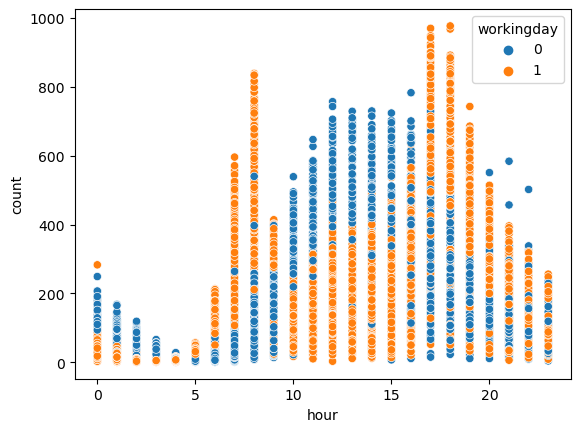

In [9]:
sns.scatterplot(data = cycledf, x = 'hour', 
                y = 'count', 
                hue = 'workingday')

#### Plotting continuous outcome and its related varables

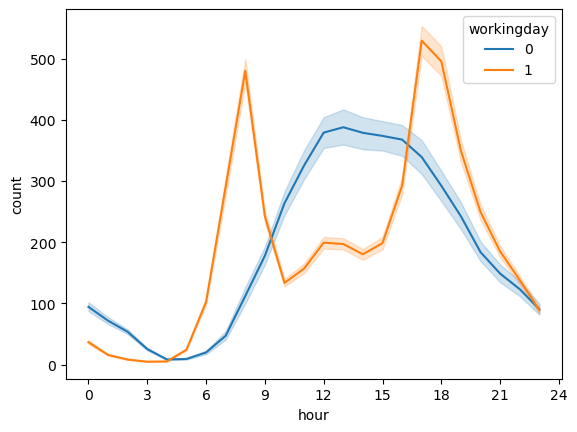

In [10]:
g=sns.lineplot(
    data=cycledf, x="hour", y="count", hue="workingday",
)
#plt.xlim(0,25)
# set the ticks first
g.set_xticks(range(0,26,3))

Text(0.5, 1.0, 'Count of bikes rented on Hours VS WorkingDay')

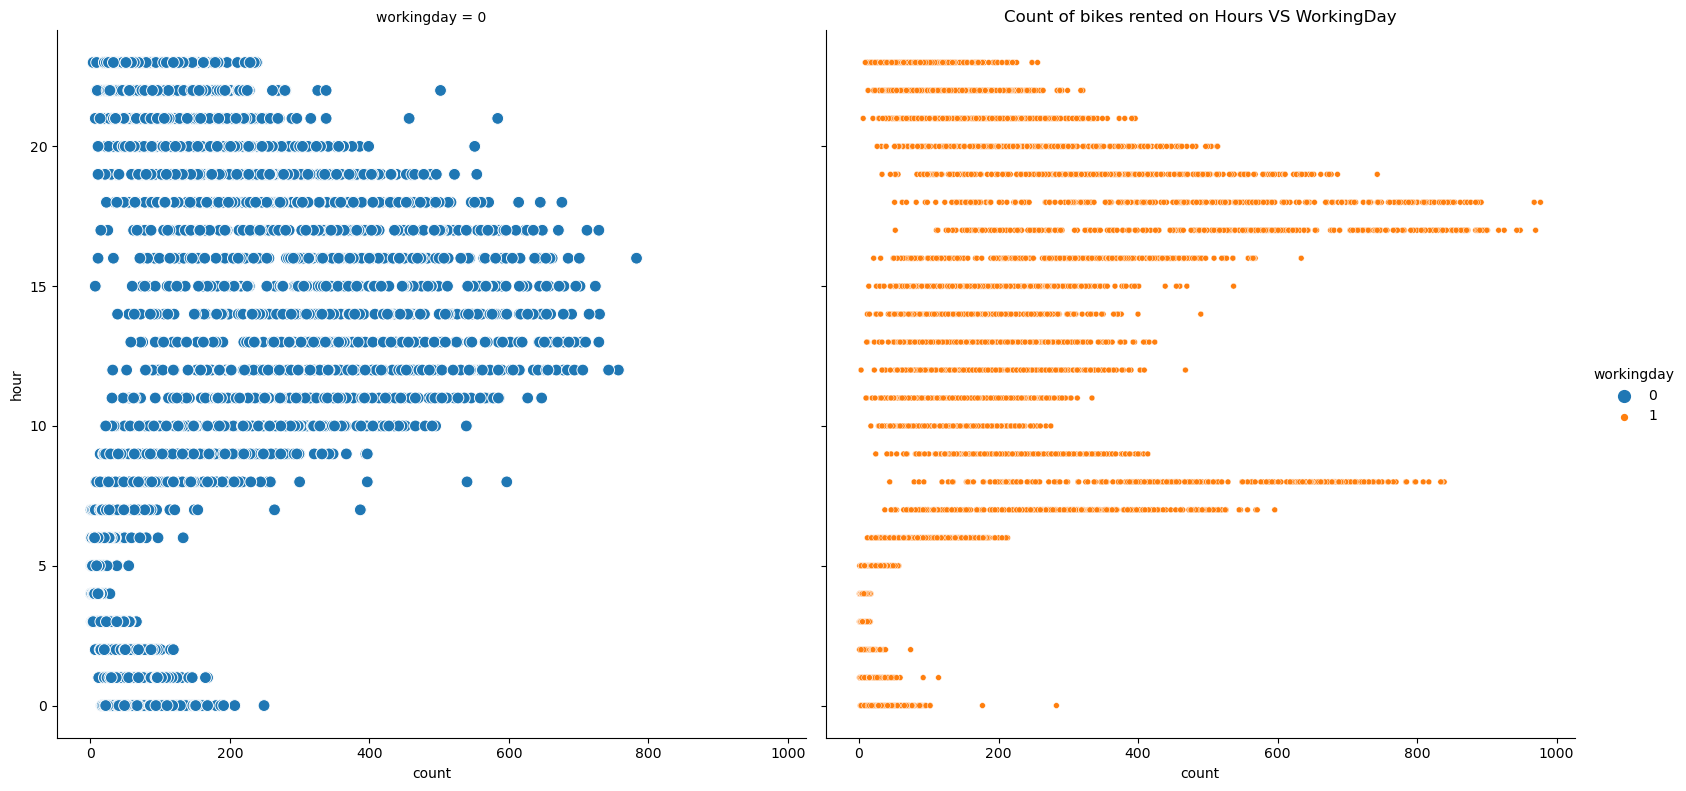

In [11]:
# Scatter plot of count and hour in relation to workingday status in different racial groups

sns.relplot(x="count", y="hour", hue='workingday', size='workingday', col='workingday', data=cycledf, height=8)
plt.title('Count of bikes rented on Hours VS WorkingDay')
#plt.show(g)


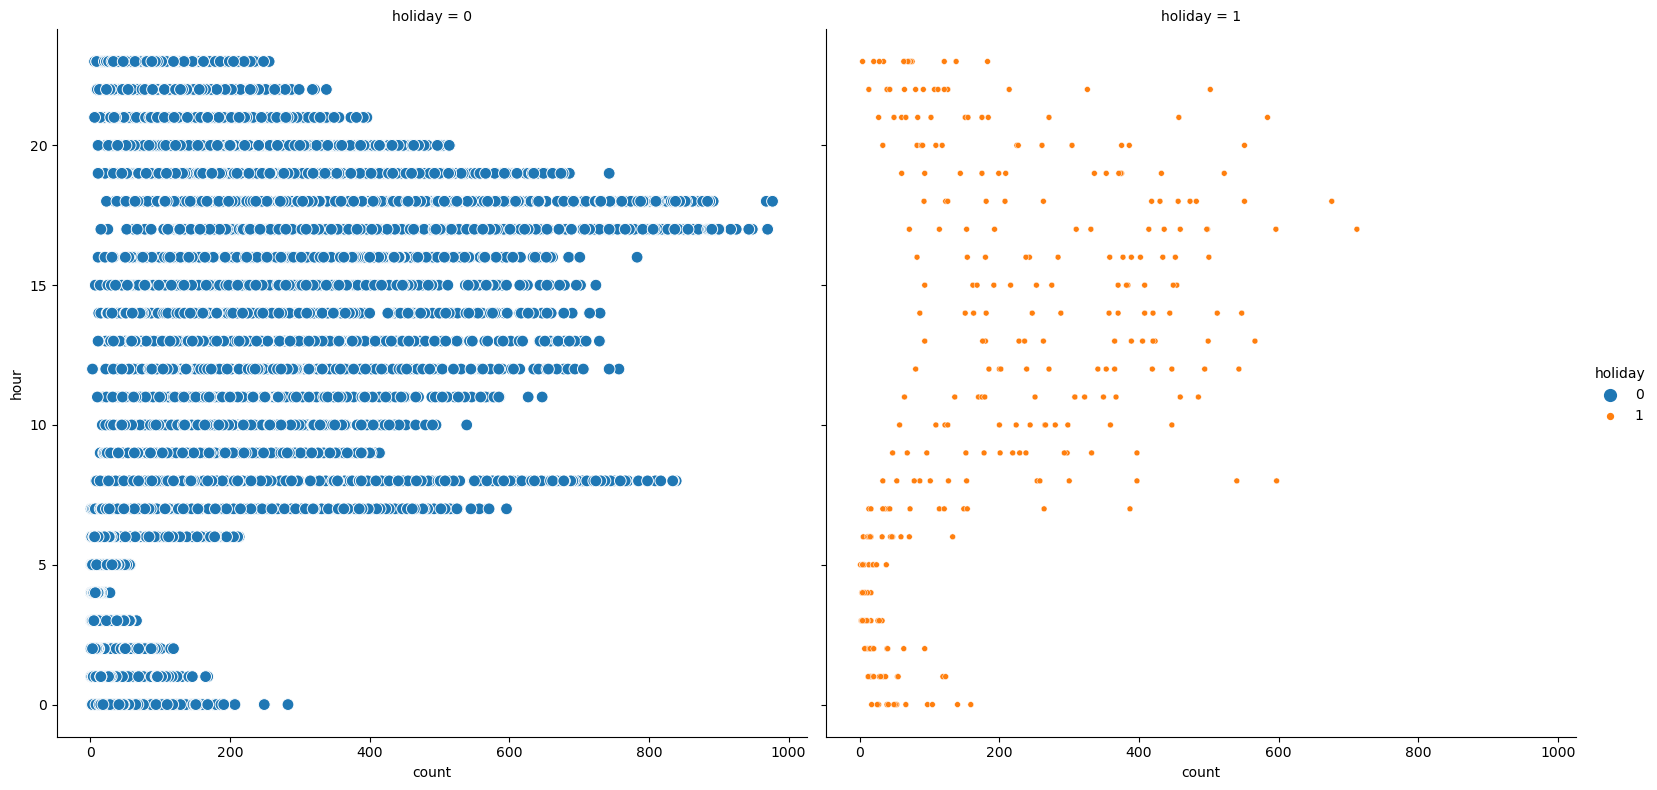

In [12]:
# Scatter plot of count and hour in relation to holiday status in different racial groups

g=sns.relplot(x="count", y="hour", hue='holiday', size='holiday', col='holiday', data=cycledf, height=8)

plt.show(g)

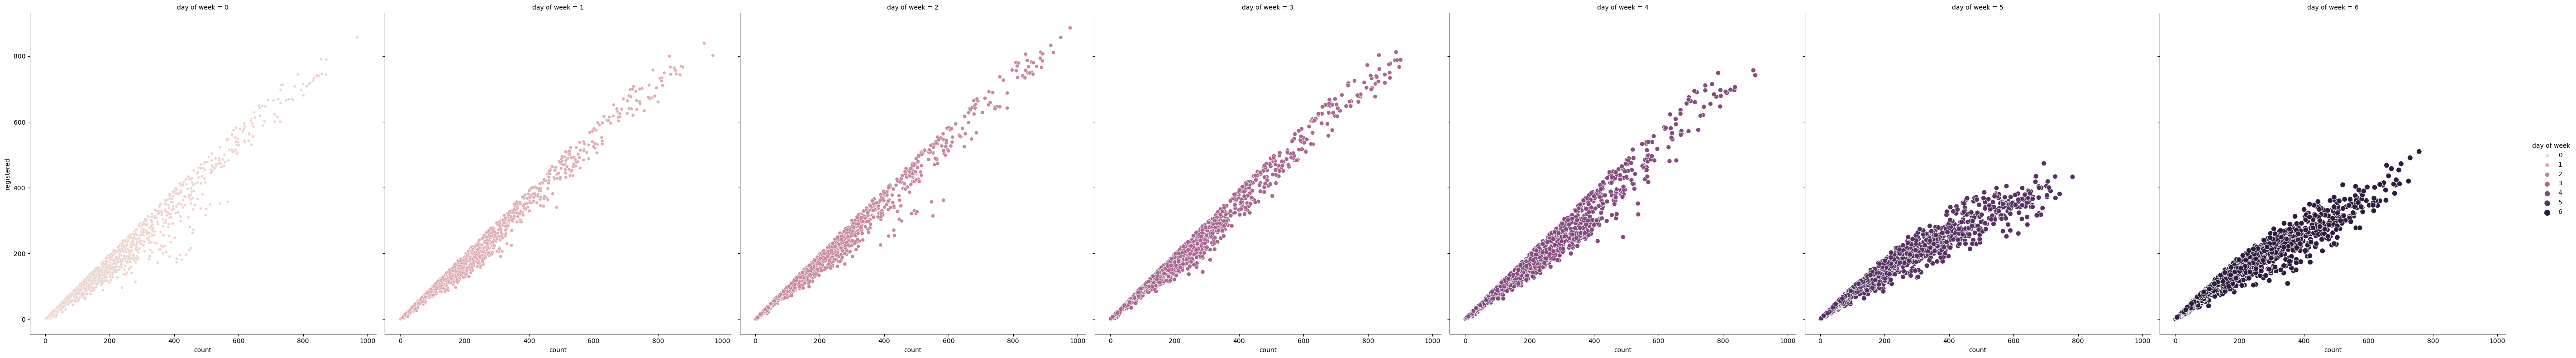

In [13]:
# Scatter plot of count and hour in relation to registered status in different racial groups

g=sns.relplot(x="count", y="registered", hue='day of week', size='day of week', col='day of week', data=cycledf, height=8)

plt.show(g)

Text(0, 0.5, 'Year')

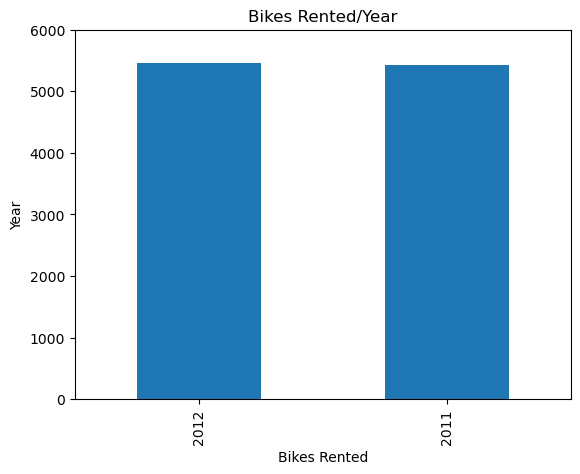

In [14]:
yearlyRented=cycledf['year'].value_counts()
yearlyRented.plot(kind='bar',ylim=(0, 6000))
plt.title('Bikes Rented/Year')
plt.xlabel("Bikes Rented")
plt.ylabel("Year")

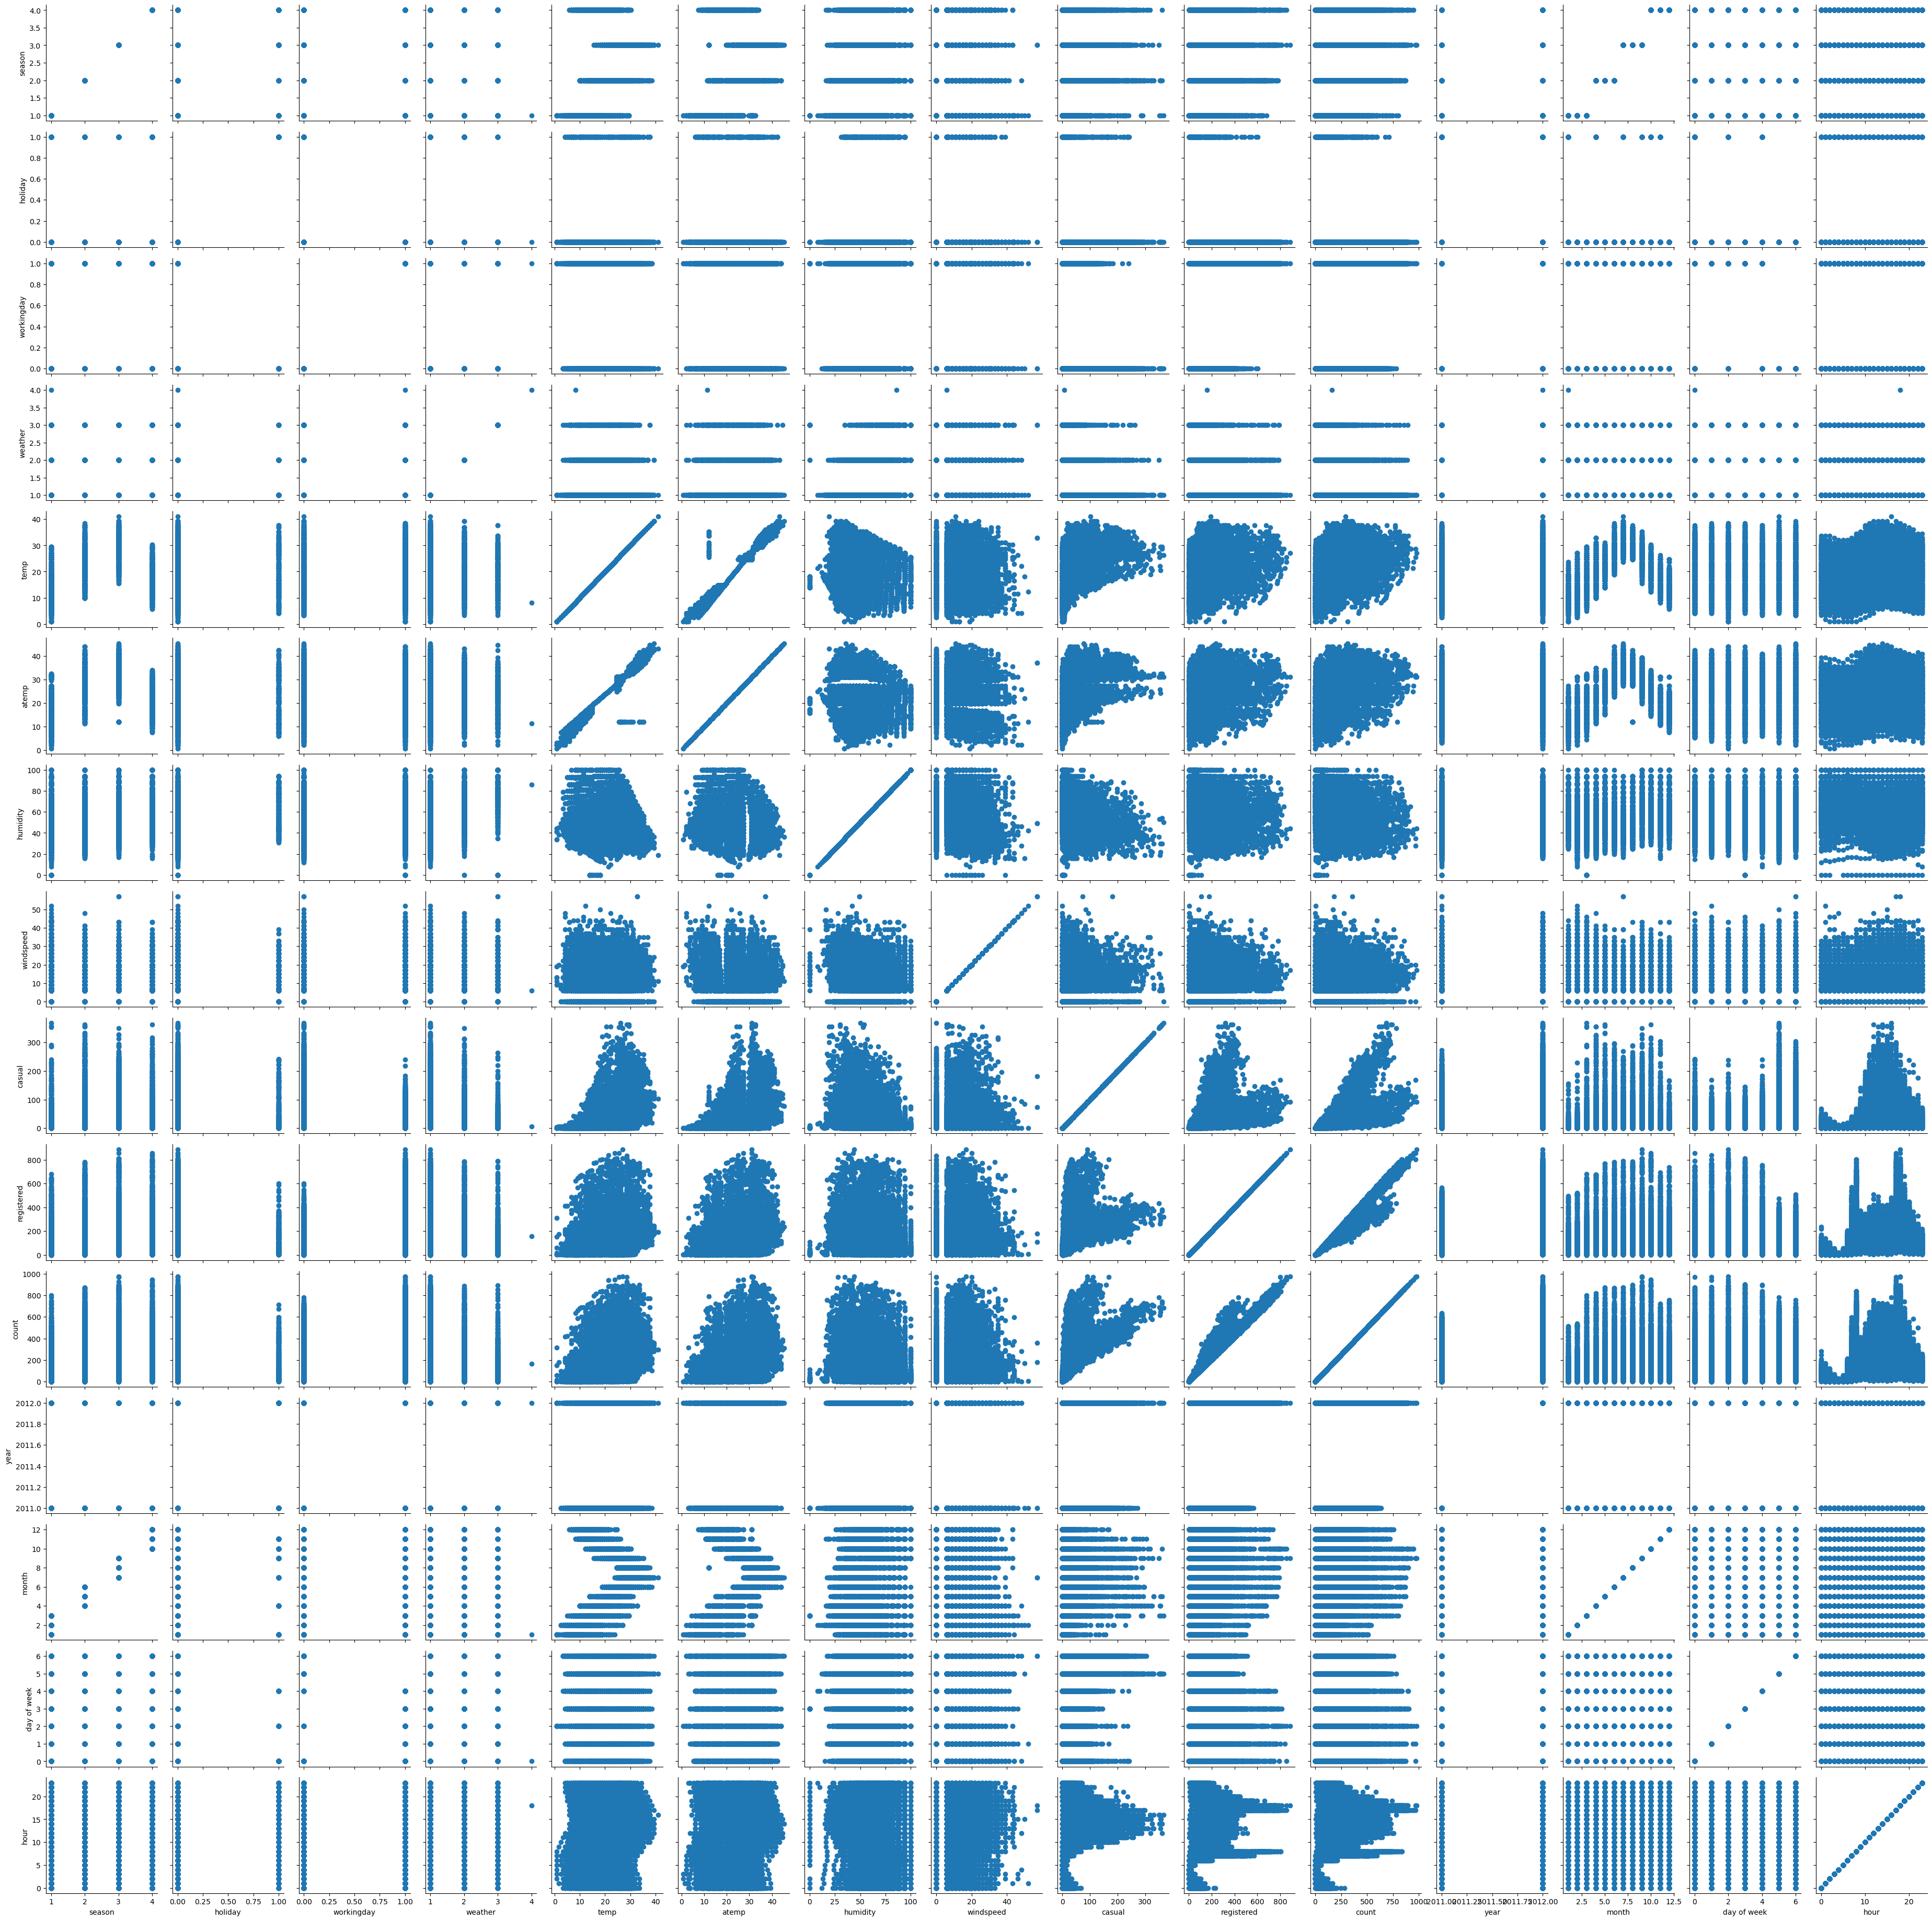

In [15]:

# Pair plot for all variables

g = sns.PairGrid(cycledf)
g = g.map(plt.scatter)
plt.show(g)

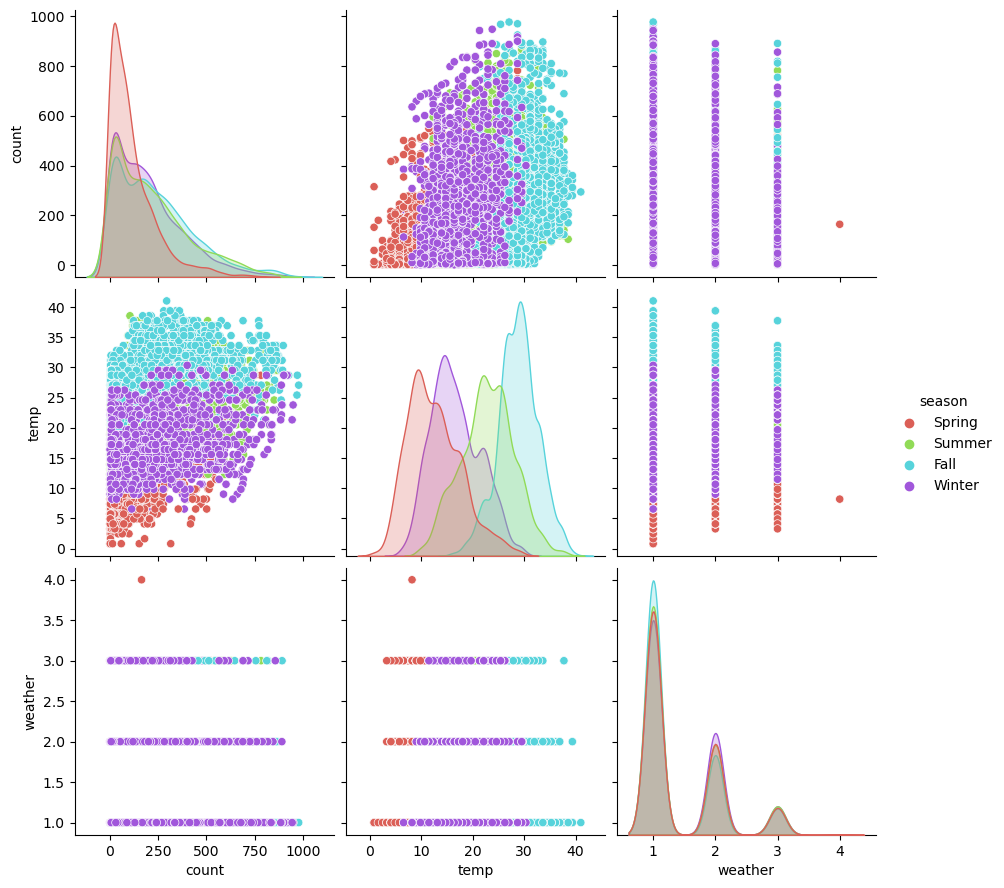

In [16]:

# For a subset of continuous variables grouped by another categorical variable: with labels of categorical groups

g = sns.pairplot(cycledf[['count','temp', 'season', 'weather']].replace({'season': {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}}), hue='season', palette='hls', height=3)

plt.show(g)

### With regression line

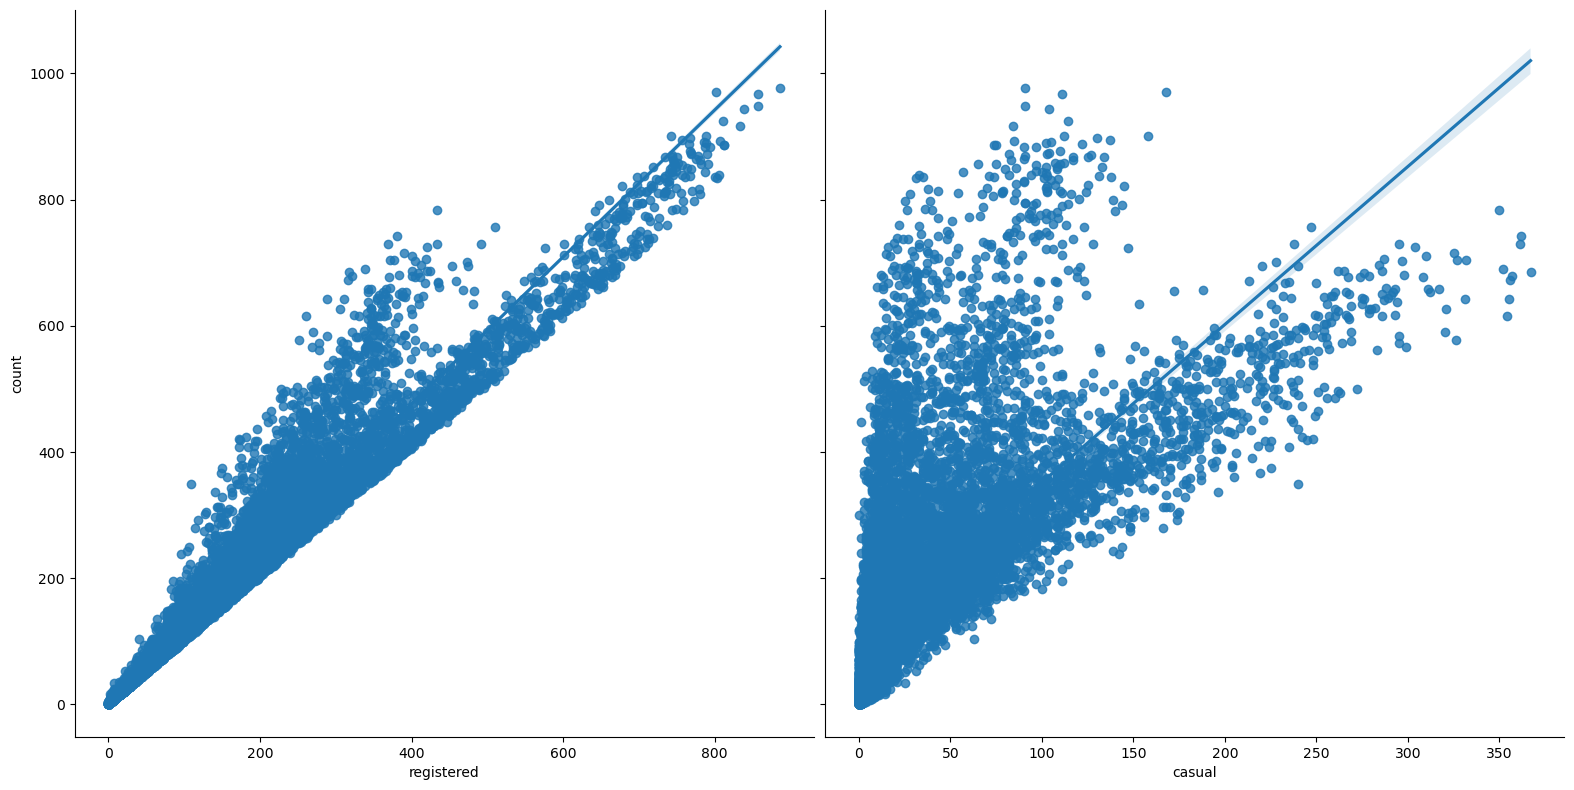

In [17]:
# pair plot with regression line

g = sns.pairplot(data=cycledf, x_vars=["registered", "casual"], y_vars=["count"], aspect=1, kind="reg", height=8)

plt.show(g)

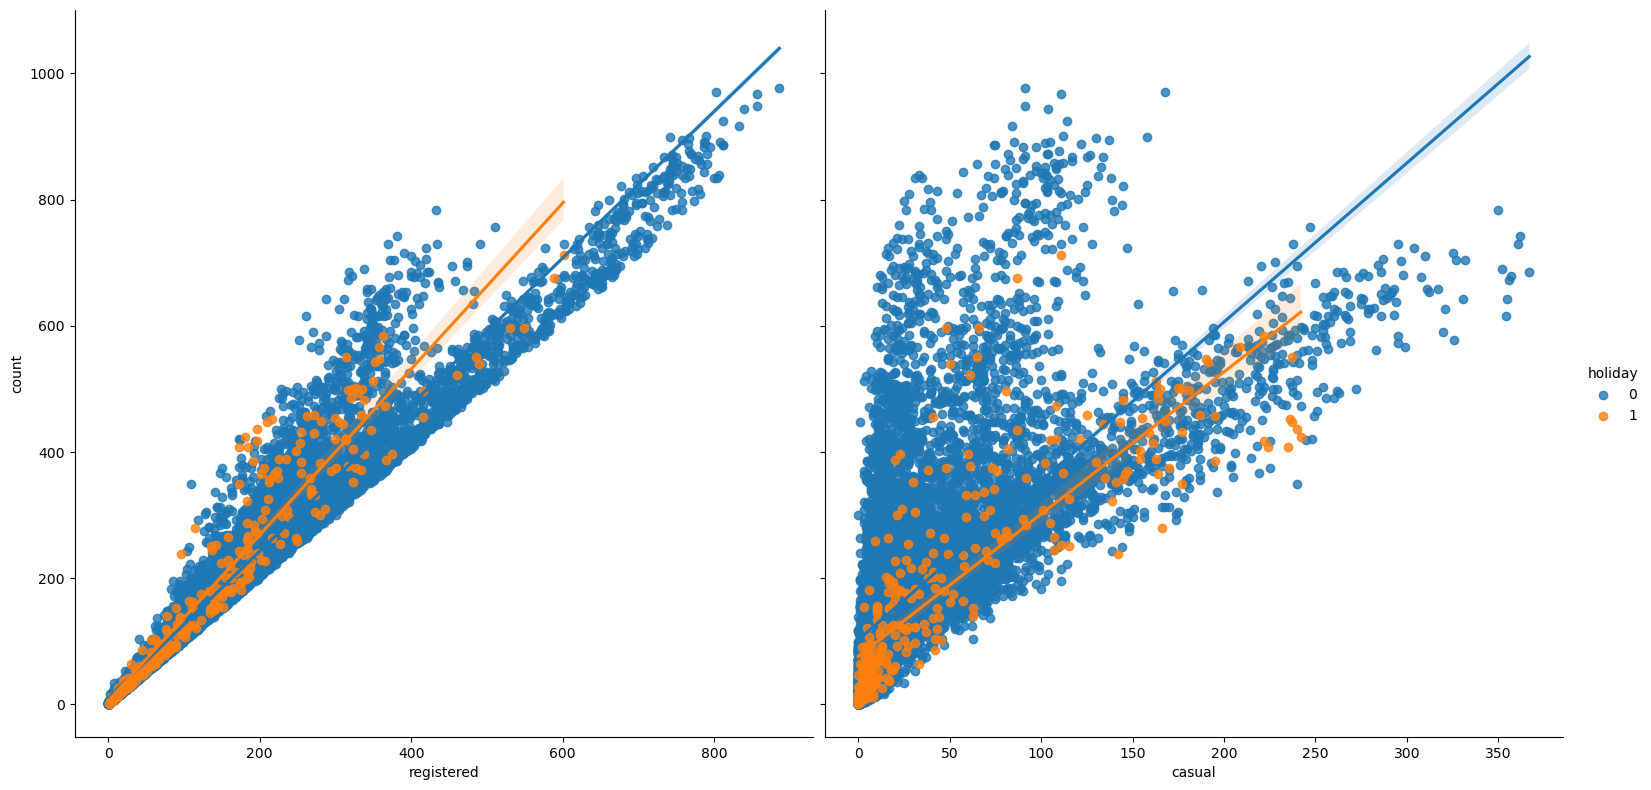

In [18]:
# pair plot with regression line: scatter points identified as a categorical variable (e.g., holiday)

g = sns.pairplot(data=cycledf, x_vars=["registered", "casual"], y_vars=["count"], hue='holiday', aspect=1, kind="reg", height=8)

plt.show(g)

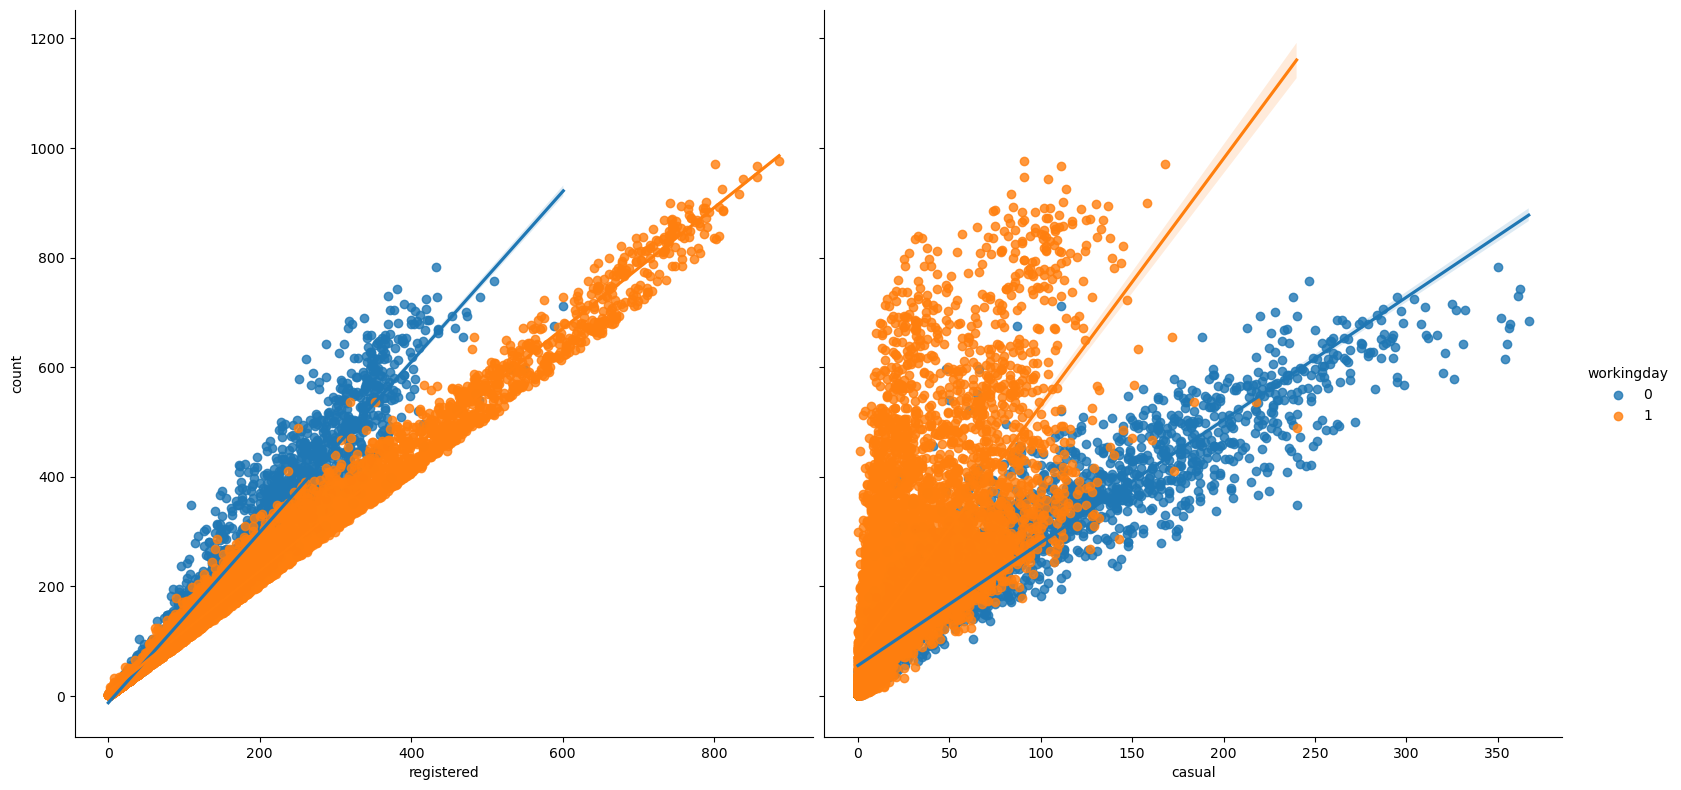

In [19]:
# pair plot with regression line: scatter points identified as a categorical variable (e.g., holiday)

g = sns.pairplot(data=cycledf, x_vars=["registered", "casual"], y_vars=["count"], hue='workingday', aspect=1, kind="reg", height=8)

plt.show(g)

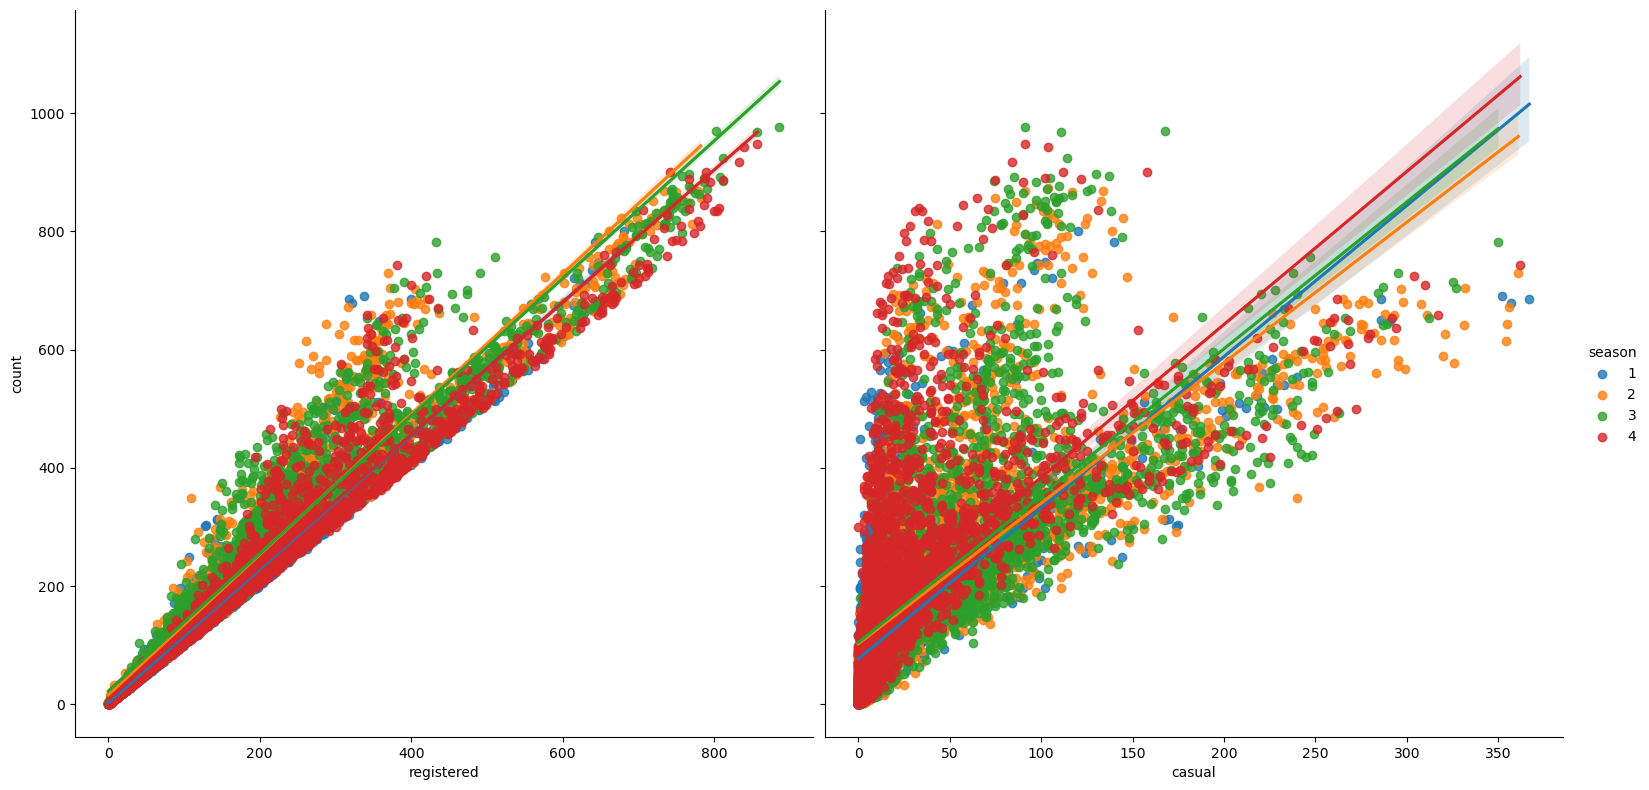

In [20]:
# pair plot with regression line: scatter points identified as a categorical variable (e.g., holiday)
#h=cycledf[['season']].replace({'season': {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}})
g = sns.pairplot(data=cycledf, x_vars=["registered", "casual"], y_vars=["count"], hue='season', aspect=1, kind="reg", height=8)

plt.show(g)

# Test-Train-Split

In [21]:
X = cycledf.drop(columns=['count'])
y = cycledf['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature Engineering

In [22]:
#casual + registerd = column count
#Drop 2 columns casual and registered from train data
X_train=X_train.drop('casual',axis=1)
X_train=X_train.drop('registered',axis=1)
X_train.head(3)

season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2011-07-06 05:00:00       3        0           1        1  27.88  31.820   
2012-08-04 16:00:00       3        0           0        1  36.90  40.910   
2012-07-11 15:00:00       3        0           1        1  32.80  35.605   

                     humidity  windspeed  year  month  day of week  hour  
datetime                                                                  
2011-07-06 05:00:00        83     6.0032  2011      7            2     5  
2012-08-04 16:00:00        39    19.9995  2012      8            5    16  
2012-07-11 15:00:00        41    16.9979  2012      7            2    15

In [23]:
#Delete object type columns from test data
X_test=X_test.drop('casual',axis=1)
X_test=X_test.drop('registered',axis=1)
X_test.head(3)

season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2011-07-19 11:00:00       3        0           1        1  33.62  40.150   
2012-01-16 06:00:00       1        1           0        1   4.10   6.820   
2011-12-11 18:00:00       4        0           0        1   9.84  11.365   

                     humidity  windspeed  year  month  day of week  hour  
datetime                                                                  
2011-07-19 11:00:00        59     0.0000  2011      7            1    11  
2012-01-16 06:00:00        54     6.0032  2012      1            0     6  
2011-12-11 18:00:00        48    12.9980  2011     12            6    18

In [24]:
X_train.shape

(8708, 12)

In [25]:
y_train.shape

(8708,)

# scale

In [26]:
# For train and test
# StandardScaler will subtract the mean from each value then scale to the unit variance
scaler = StandardScaler()
trainScale = scaler.fit_transform(X_train)
testScale = scaler.transform(X_test)

X_train = pd.DataFrame(trainScale, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(testScale, index=X_test.index, columns=X_test.columns)
X_test

season   holiday  workingday   weather      temp  \
datetime                                                                  
2011-07-19 11:00:00  0.441439 -0.173335    0.684445 -0.657286  1.714295   
2012-01-16 06:00:00 -1.351912  5.769182   -1.461037 -0.657286 -2.076161   
2011-12-11 18:00:00  1.338114 -0.173335   -1.461037 -0.657286 -1.339128   
2012-08-15 10:00:00  0.441439 -0.173335    0.684445  0.919910  1.187843   
2012-06-15 23:00:00 -0.455237 -0.173335    0.684445 -0.657286  0.661390   
...                       ...       ...         ...       ...       ...   
2011-05-08 17:00:00 -0.455237 -0.173335   -1.461037  2.497106  0.450810   
2012-01-17 04:00:00 -1.351912 -0.173335    0.684445  2.497106 -0.917966   
2012-11-04 14:00:00  1.338114 -0.173335   -1.461037 -0.657286 -0.496805   
2012-01-01 05:00:00 -1.351912 -0.173335   -1.461037 -0.657286 -1.128547   
2012-05-15 13:00:00 -0.455237 -0.173335    0.684445  2.497106  0.766681   

                        atemp  humidity  windspeed      year     month  \
datetime                                                                 
2011-07-19 11:00:00  1.945155 -0.145763  -1.560473 -1.003221  0.138224   
2012-01-16 06:00:00 -1.994626 -0.404996  -0.828356  0.996790 -1.608740   
2011-12-11 18:00:00 -1.457383 -0.716075   0.024691 -1.003221  1.594028   
2012-08-15 10:00:00  1.228831  0.009776   0.024691  0.996790  0.429385   
2012-06-15 23:00:00  0.870670 -0.456842   0.512496  0.996790 -0.152936   
...                       ...       ...        ...       ...       ...   
2011-05-08 17:00:00  0.423263 -0.664229   0.756807 -1.003221 -0.444097   
2012-01-17 04:00:00 -1.009976  0.217162   1.122866  0.996790 -1.608740   
2012-11-04 14:00:00 -0.382897 -1.130847   0.024691  0.996790  1.302868   
2012-01-01 05:00:00 -1.099221  0.994860  -0.706609  0.996790 -1.608740   
2012-05-15 13:00:00  0.781425  0.580088   0.024691  0.996790 -0.444097   

                     day of week      hour  
datetime                                    
2011-07-19 11:00:00    -1.009722 -0.079137  
2012-01-16 06:00:00    -1.509817 -0.801491  
2011-12-11 18:00:00     1.490750  0.932159  
2012-08-15 10:00:00    -0.509628 -0.223608  
2012-06-15 23:00:00     0.490561  1.654513  
...                          ...       ...  
2011-05-08 17:00:00     1.490750  0.787688  
2012-01-17 04:00:00    -1.009722 -1.090433  
2012-11-04 14:00:00     1.490750  0.354275  
2012-01-01 05:00:00     1.490750 -0.945962  
2012-05-15 13:00:00    -1.009722  0.209805  

[2178 rows x 12 columns]

# LinearRegression

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Coefficients:", lr.coef_)
print("Intercept   :", lr.intercept_)

Coefficients: [ -9.09873118  -0.91764208   1.42375213  -3.29342526   8.96055131
  42.55132034 -39.18634503   4.48994775  41.34314744  34.96502449
   1.32920184  54.43851559]
Intercept   : 191.584749655498


In [28]:
y_pred = lr.predict(X_test)
y_pred

array([245.40841132,  46.67140956, 200.79736016, ..., 311.36640168,
        40.53128514, 241.89807758])

/Users/niyantmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


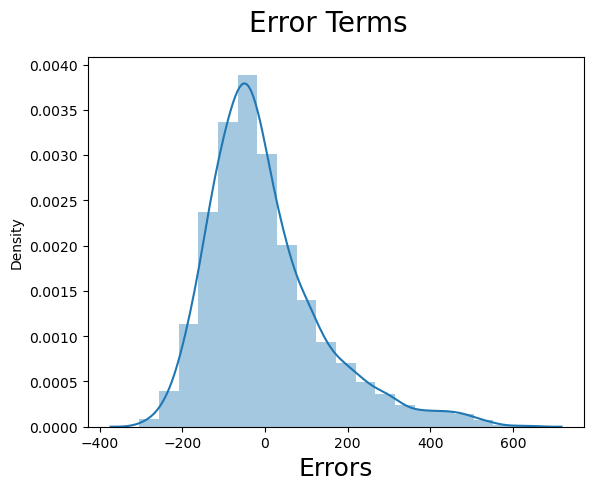

In [29]:
# We need to make prediction of y_train_pred using our X_train with constant on our final lr_19 model.
y_train_pred = lr.predict(X_train)
# We have our predicted scores now, and thus we can take the residuals
residuals=y_train-y_train_pred

# Plot the distribution of errors
fig=plt.figure()
sns.distplot((residuals),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

In [30]:
print("train score :", lr.score(X_train, y_train))
print("test score  :", lr.score(X_test, y_test))

train score : 0.3875452733592716
test score  : 0.3955034704897161


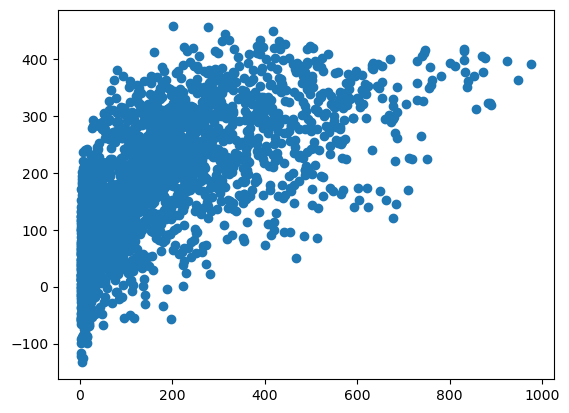

In [31]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_pred)
plt.show()

In [32]:
# Model Evaluation Matric

In [33]:
# The mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The mean absolute error 
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction f
print('R-squared (Coefficient of determination): %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 19952.58
Mean absolute error: 105.31
R-squared (Coefficient of determination): 0.40


# Feature Expansion Strategies
# PolynomialFeatures

In [34]:
#applying polynomial regression degree 2
#After converting to polynomial terms, we fit the linear regression which is now working as polynomial regression
p = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = p.fit_transform(X_train)
X_test_poly = p.fit_transform(X_test)
#include bias parameter
p_lr = LinearRegression()
p_lr.fit(X_train_poly, y_train)
y_pred = p_lr.predict(X_test_poly)
r2=r2_score(y_test, y_pred)
print('R-squared (Coefficient of determination): %.2f'
      % r2)
p_lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

R-squared (Coefficient of determination): 0.56


# Regularization

In [35]:
# Ridge Regression without polynomial features
lr_ridge0 = Ridge(alpha=1, random_state=31)
lr_ridge0.fit(X_train, y_train) 
ypred_ridge0 = lr_ridge0.predict(X_test)
'''ValueError: Expected 2D array, got 1D array instead:
array=[127  13 163 ... 509   5 239].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.'''
#lr_ridge_r2_0 = lr_ridge.score(y_test, ypred_ridge)
lr_ridge_r2_0 = r2_score(y_test, ypred_ridge0)
lr_ridge_rmse0 = np.sqrt(mean_squared_error(y_test, ypred_ridge0))
lr_ridge_rmse0

141.25303104508933

In [36]:
# Ridge Regression with polynomial features
lr_ridge1 = Ridge(alpha=1, random_state=31)
lr_ridge1.fit(X_train_poly, y_train) 
ypred_ridge1 = lr_ridge1.predict(X_test_poly)
lr_ridge_r2_1 = r2_score(y_test, ypred_ridge1)
lr_ridge_rmse1 = np.sqrt(mean_squared_error(y_test, ypred_ridge1))
print(lr_ridge_r2_1)
lr_ridge_rmse1

0.56104891637283


120.36789549198862

In [37]:
# Lasso Regression without polynomial features
lr_lasso0 = Lasso(alpha=1, random_state=31)
lr_lasso0.fit(X_train,y_train)
ypred_lasso0=lr_lasso0.predict(X_test)
lr_lasso_r2_0=r2_score(y_test, ypred_lasso0)
lr_lasso_rmse0 = np.sqrt(mean_squared_error(y_test, ypred_lasso0))
lr_lasso_rmse0

141.29557629589408

In [38]:
# Lasso Regression with polynomial features
lr_lasso1 = Lasso(alpha=1, random_state=31)
lr_lasso1.fit(X_train_poly, y_train) 
ypred_lasso1 = lr_lasso1.predict(X_test_poly)
lr_lasso_r2_1=r2_score(y_test, ypred_lasso1)
lr_lasso_rmse1 = np.sqrt(mean_squared_error(y_test, ypred_lasso1))
lr_lasso_rmse1

121.11424634287059

In [39]:
# ElasticNet Regression without polynomial features 
lr_elastic_net = ElasticNet(alpha=1, l1_ratio=.5,
                           random_state=31)
lr_elastic_net.fit(X_train, y_train)
ypred_elastic=lr_elastic_net.predict(X_test)
lr_elastic_r2 = r2_score(y_test, ypred_elastic)
lr_elastic_rmse = np.sqrt(mean_squared_error(y_test, ypred_elastic))
lr_elastic_rmse

144.04820431138006

In [40]:
# ElasticNet Regression without polynomial features 
lr_elastic_net1 = ElasticNet(alpha=1, l1_ratio=.5,
                           random_state=31)
lr_elastic_net1.fit(X_train_poly, y_train)
ypred_elastic1=lr_elastic_net1.predict(X_test_poly)
lr_elastic_r2_1 = r2_score(y_test, ypred_elastic1)
lr_elastic_rmse1 = np.sqrt(mean_squared_error(y_test, ypred_elastic1))
lr_elastic_rmse

144.04820431138006

In [41]:
myTable = PrettyTable(["Model", "R² score", "Mean Squared Error"])
myTable.add_row(["PolynomialFeatures", format(r2, '.2f'), format(p_lr_rmse, '.2f')])
myTable.add_row(["Ridge with Poly", format(lr_ridge_r2_0, '.2f'), format(lr_ridge_rmse0, '.2f')])
myTable.add_row(["Lasso with Poly", format(lr_lasso_r2_0, '.2f'), format(lr_lasso_rmse0, '.2f')])
myTable.add_row(["ElasticNet with Poly", format(lr_elastic_r2, '.2f'), format(lr_elastic_rmse, '.2f')])
myTable.add_row(["Ridge without Poly", format(lr_ridge_r2_1, '.2f'), format(lr_ridge_rmse1, '.2f')])
myTable.add_row(["Lasso without Poly", format(lr_lasso_r2_1, '.2f'), format(lr_lasso_rmse1, '.2f')])
myTable.add_row(["ElasticNet without Poly", format(lr_elastic_r2_1, '.2f'), format(lr_elastic_rmse1, '.2f')])

print(myTable)

+-------------------------+----------+--------------------+
|          Model          | R² score | Mean Squared Error |
+-------------------------+----------+--------------------+
|    PolynomialFeatures   |   0.56   |       120.45       |
|     Ridge with Poly     |   0.40   |       141.25       |
|     Lasso with Poly     |   0.40   |       141.30       |
|   ElasticNet with Poly  |   0.37   |       144.05       |
|    Ridge without Poly   |   0.56   |       120.37       |
|    Lasso without Poly   |   0.56   |       121.11       |
| ElasticNet without Poly |   0.51   |       127.46       |
+-------------------------+----------+--------------------+


# Variance Inflation Factor

In [42]:
X_vif = add_constant(X_train)  # add constant to reflect the intercept; would not be required for de-meaned features

In [43]:
X_vif.head()

const    season   holiday  workingday   weather  \
datetime                                                               
2011-07-06 05:00:00    1.0  0.441439 -0.173335    0.684445 -0.657286   
2012-08-04 16:00:00    1.0  0.441439 -0.173335   -1.461037 -0.657286   
2012-07-11 15:00:00    1.0  0.441439 -0.173335    0.684445 -0.657286   
2011-04-10 04:00:00    1.0 -0.455237 -0.173335   -1.461037  0.919910   
2011-11-19 10:00:00    1.0  1.338114 -0.173335   -1.461037 -0.657286   

                         temp     atemp  humidity  windspeed      year  \
datetime                                                                 
2011-07-06 05:00:00  0.977262  0.960505  1.098553  -0.828356 -1.003221   
2012-08-04 16:00:00  2.135457  2.034991 -1.182694   0.878555  0.996790   
2012-07-11 15:00:00  1.609005  1.407912 -1.079001   0.512496  0.996790   
2011-04-10 04:00:00 -0.707385 -0.651814  1.617019  -0.706609 -1.003221   
2011-11-19 10:00:00 -0.917966 -1.009976 -0.871615   0.512496 -1.003221   

                        month  day of week      hour  
datetime                                              
2011-07-06 05:00:00  0.138224    -0.509628 -0.945962  
2012-08-04 16:00:00  0.429385     0.990656  0.643217  
2012-07-11 15:00:00  0.138224    -0.509628  0.498746  
2011-04-10 04:00:00 -0.735258     1.490750 -1.090433  
2011-11-19 10:00:00  1.302868     0.990656 -0.223608

In [44]:
o = OLS(y_train, add_constant(X_train))
o_result = o.fit()
print(o_result.params)
print(o_result.summary())

const          191.584750
season          -9.098731
holiday         -0.917642
workingday       1.423752
weather         -3.293425
temp             8.960551
atemp           42.551320
humidity       -39.186345
windspeed        4.489948
year            41.343147
month           34.965024
day of week      1.329202
hour            54.438516
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     458.5
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:42:49   Log-Likelihood:                -55490.
No. Observations:                8708   AIC:                         1.110e+05
Df Residuals:                    8695   BIC:                         1.111e+05
Df Model:      

In [45]:
'''
vifs = []

for i, _ in enumerate(X_vif.columns):
    vif = variance_inflation_factor(X_vif.values, i)
    vifs.append(vif)
    vifdf=pd.DataFrame(vifs,index=X_vif.columns)
vifdf
'''

'\nvifs = []\n\nfor i, _ in enumerate(X_vif.columns):\n    vif = variance_inflation_factor(X_vif.values, i)\n    vifs.append(vif)\n    vifdf=pd.DataFrame(vifs,index=X_vif.columns)\nvifdf\n'

In [46]:
# # calculate the VIF for each input feature 
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5         atemp  35.59
4          temp  35.52
9         month  18.25
0        season  18.16
2    workingday   2.88
10  day of week   2.80
6      humidity   1.55
1       holiday   1.52
3       weather   1.25
7     windspeed   1.20
11         hour   1.12
8          year   1.01

In [47]:
# Removing the variable 'atemp' based on its High p-value & High VIF

In [48]:
X_train.drop(['atemp'], axis=1, inplace=True)
X_test.drop(['atemp'], axis=1, inplace=True)

o = OLS(y_train, add_constant(X_train))
o_result = o.fit()
print(o_result.params)
print(o_result.summary())

const          191.584750
season          -9.167189
holiday         -1.625635
workingday       0.435471
weather         -3.543924
temp            50.795384
humidity       -38.779553
windspeed        2.946911
year            41.278433
month           35.151702
day of week      0.387645
hour            54.627702
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     497.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:42:49   Log-Likelihood:                -55501.
No. Observations:                8708   AIC:                         1.110e+05
Df Residuals:                    8696   BIC:                         1.111e+05
Df Model:                          11    

In [49]:
# # calculate the VIF for each input feature 
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8         month  18.25
0        season  18.16
2    workingday   2.86
9   day of week   2.78
5      humidity   1.55
1       holiday   1.51
3       weather   1.25
6     windspeed   1.15
10         hour   1.12
4          temp   1.11
7          year   1.01

In [50]:
# The VIF and p-values have dropped alot. We can now move onto next variable.
#month has the highest VIF with a very high P-value too. As this variable is being captured 
#by other variables and it's p-value suggests that it is statistically it is 
#not useful for our model. Thus we can delete this sub-category.

# Recursive Feature Elimination

In [51]:
rfe = RFE(estimator=LinearRegression(), verbose=1, n_features_to_select=5)  # let's keep 5 features
Xtrain=X_train
Xtest=X_test
ytrain=y_train
ytest=y_test
rfe.fit(Xtrain, ytrain)
col=rfe.feature_names_in_[rfe.support_]  # feature_names_in_ are all features; support_ indicates which features to chose
col

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


array(['temp', 'humidity', 'year', 'month', 'hour'], dtype=object)

In [52]:
rfe.feature_names_in_[~rfe.support_] 

array(['season', 'holiday', 'workingday', 'weather', 'windspeed',
       'day of week'], dtype=object)

In [53]:
print(dict(zip(Xtrain.columns, rfe.ranking_)))

{'season': 2, 'holiday': 5, 'workingday': 6, 'weather': 3, 'temp': 1, 'humidity': 1, 'windspeed': 4, 'year': 1, 'month': 1, 'day of week': 7, 'hour': 1}


In [54]:
rfe.score(X_train, y_train)

0.38525455710583534

Creating X_test dataframe with RFE selected variables

In [55]:
Xtrain_rfe = Xtrain[col]
# Adding a constant variable 
Xtrain_rfe = add_constant(Xtrain_rfe)
lm = OLS(ytrain,Xtrain_rfe).fit()   # Running the linear model
Xtrain_rfe.columns
# Making predictions
# Adding a constant variable 
Xtest_new = add_constant(Xtest)
# Creating X_test_new dataframe by dropping variables from X_test
Xtest_new = Xtest_new[Xtrain_rfe.columns]
ypred = lm.predict(Xtest_new)
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     1091.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:42:49   Log-Likelihood:                -55506.
No. Observations:                8708   AIC:                         1.110e+05
Df Residuals:                    8702   BIC:                         1.111e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.5847      1.521    125.934      0.0

Text(0, 0.5, 'ypred')

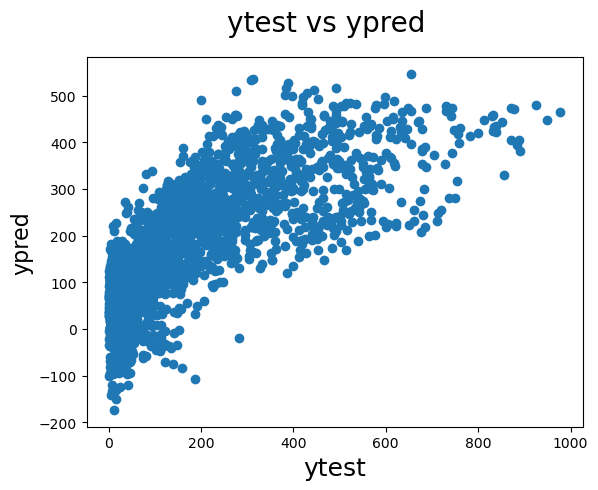

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('ytest vs ypred', fontsize=20)              # Plot heading 
plt.xlabel('ytest', fontsize=18)                          # X-label
plt.ylabel('ypred', fontsize=16)  

# Hyperparameter optimization
#### Cross-validation without hyperparameter optimization

In [57]:
# Let's take ElasticNet as an example
en = ElasticNet()
cross_val_score(en, X_train, y_train, cv = 5)  

array([0.35049791, 0.36022581, 0.34836521, 0.34778599, 0.36808843])

In [58]:
#5 models were fit (= trained) and evaluated. Wow!
np.mean(cross_val_score(en,X_train,y_train)).round(2)

0.35

### Hyperparameter optimization

In [59]:
en.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [60]:
# define our hyperparameters to combine
hyperparams = {
    'alpha': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0], 
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    # add as many key: value pairs here as you consider appropriate to add for gridsearch
}

In [61]:
gridsearch1 = GridSearchCV(en, hyperparams, cv = 3)  # This is the core cell of this encounter!!

In [62]:
gridsearch1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0,
                                   50.0, 100.0],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]})

#### Get best model, parameters and score

In [63]:
gridsearch1.best_estimator_  # which model is the best

ElasticNet(alpha=0.1, l1_ratio=0.9)

In [64]:
gridsearch1.best_params_  # which parameter combination is the best

{'alpha': 0.1, 'l1_ratio': 0.9}

In [65]:
gridsearch1.best_score_  # how good does the best model and parameter set perform

0.38410253647985765

In [66]:
gridsearch1.cv_results_  # works but a bit complex

{'mean_fit_time': array([0.00441567, 0.00569208, 0.00495664, 0.006042  , 0.00509961,
        0.00556469, 0.00716265, 0.00679906, 0.00867589, 0.00399264,
        0.00350348, 0.00300002, 0.00355983, 0.00443904, 0.00496085,
        0.0049154 , 0.00626508, 0.00547234, 0.00227507, 0.00211414,
        0.00204158, 0.00275731, 0.0022397 , 0.00181794, 0.00214577,
        0.00278131, 0.00323502, 0.0020322 , 0.00223414, 0.00216405,
        0.00280166, 0.00266274, 0.00254401, 0.00271646, 0.00337696,
        0.00297936, 0.002232  , 0.00199866, 0.00222596, 0.00231679,
        0.00257826, 0.00205215, 0.0023586 , 0.00249338, 0.00249362,
        0.00167108, 0.0014116 , 0.00169396, 0.00163762, 0.00183964,
        0.00186992, 0.00207392, 0.00199596, 0.00212852, 0.00164946,
        0.0018913 , 0.00168244, 0.00175174, 0.00162268, 0.0020353 ,
        0.00209395, 0.00182867, 0.00201702, 0.00166122, 0.0019989 ,
        0.00187397, 0.0019873 , 0.00156196, 0.00182907, 0.00236344,
        0.00175333, 0.0018487 ,

In [67]:
pd.DataFrame({'params':gridsearch1.cv_results_['params'],
              'mean_fit_time':gridsearch1.cv_results_['mean_fit_time'],
              'mean_test_score':gridsearch1.cv_results_['mean_test_score']}).sort_values(by = 'mean_test_score', ascending= False)

params  mean_fit_time  mean_test_score
8     {'alpha': 0.1, 'l1_ratio': 0.9}       0.008676         0.384103
17    {'alpha': 0.2, 'l1_ratio': 0.9}       0.005472         0.384085
7     {'alpha': 0.1, 'l1_ratio': 0.8}       0.006799         0.384012
6     {'alpha': 0.1, 'l1_ratio': 0.7}       0.007163         0.383878
16    {'alpha': 0.2, 'l1_ratio': 0.8}       0.006265         0.383725
..                                ...            ...              ...
85  {'alpha': 100.0, 'l1_ratio': 0.5}       0.001563         0.003566
86  {'alpha': 100.0, 'l1_ratio': 0.6}       0.001454         0.001845
87  {'alpha': 100.0, 'l1_ratio': 0.7}       0.001774        -0.000164
88  {'alpha': 100.0, 'l1_ratio': 0.8}       0.001436        -0.000625
89  {'alpha': 100.0, 'l1_ratio': 0.9}       0.001549        -0.000625

[90 rows x 3 columns]

In [68]:
### Evaluate the Best Model
gridsearch1.predict(X_test)  # the best model's predictions of the test data

array([239.53345542,  46.71931433, 205.38562744, ..., 306.23666966,
        44.75005213, 239.87330465])

In [69]:
gridsearch1.score(X_test, y_test)

0.39475786736416796

# Final Outcome

In [70]:
table = PrettyTable()

table.field_names = ["Model", "Mean Squared Error", "R² score","Mean Absolute Error"]
models = [
LinearRegression(),
DecisionTreeRegressor(random_state = 0),
RandomForestRegressor( random_state=0, n_estimators=300),
Lasso(alpha=0.1),
ElasticNet(random_state=0),
Ridge(alpha=.5),
]
for model in models:
    model.fit(X_train, y_train)
    y_res = model.predict(X_test)
    mse = mean_squared_error(y_test, y_res)
    score = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test,y_res)
    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f'),format(mae, '.2f')])
print(table)

#From the below output, we see that Random Forest works best for our dataset.

+-----------------------+--------------------+----------+---------------------+
|         Model         | Mean Squared Error | R² score | Mean Absolute Error |
+-----------------------+--------------------+----------+---------------------+
|    LinearRegression   |      19972.66      |   0.39   |        105.38       |
| DecisionTreeRegressor |      3521.90       |   0.89   |        33.79        |
| RandomForestRegressor |      1540.42       |   0.95   |        24.24        |
|         Lasso         |      19973.36      |   0.39   |        105.35       |
|       ElasticNet      |      21010.84      |   0.36   |        107.55       |
|         Ridge         |      19972.65      |   0.39   |        105.38       |
+-----------------------+--------------------+----------+---------------------+
